In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
housing_data = pd.read_csv("housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing_data.nlargest(5,"median_house_value")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY


In [9]:
housing_data[housing_data["ocean_proximity"]=="ISLAND"].head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND


In [10]:
c1 =housing_data["total_rooms"].between(700 ,1700)
c2 = housing_data["households"].between(160,331)
#c3 = housing_data["ocean_proximity"]!="ISLAND"
housing_data[c1&c2].groupby("ocean_proximity").first()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
INLAND,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0
ISLAND,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0
NEAR BAY,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
NEAR OCEAN,-124.16,41.92,19.0,1668.0,324.0,841.0,283.0,2.1336,75000.0


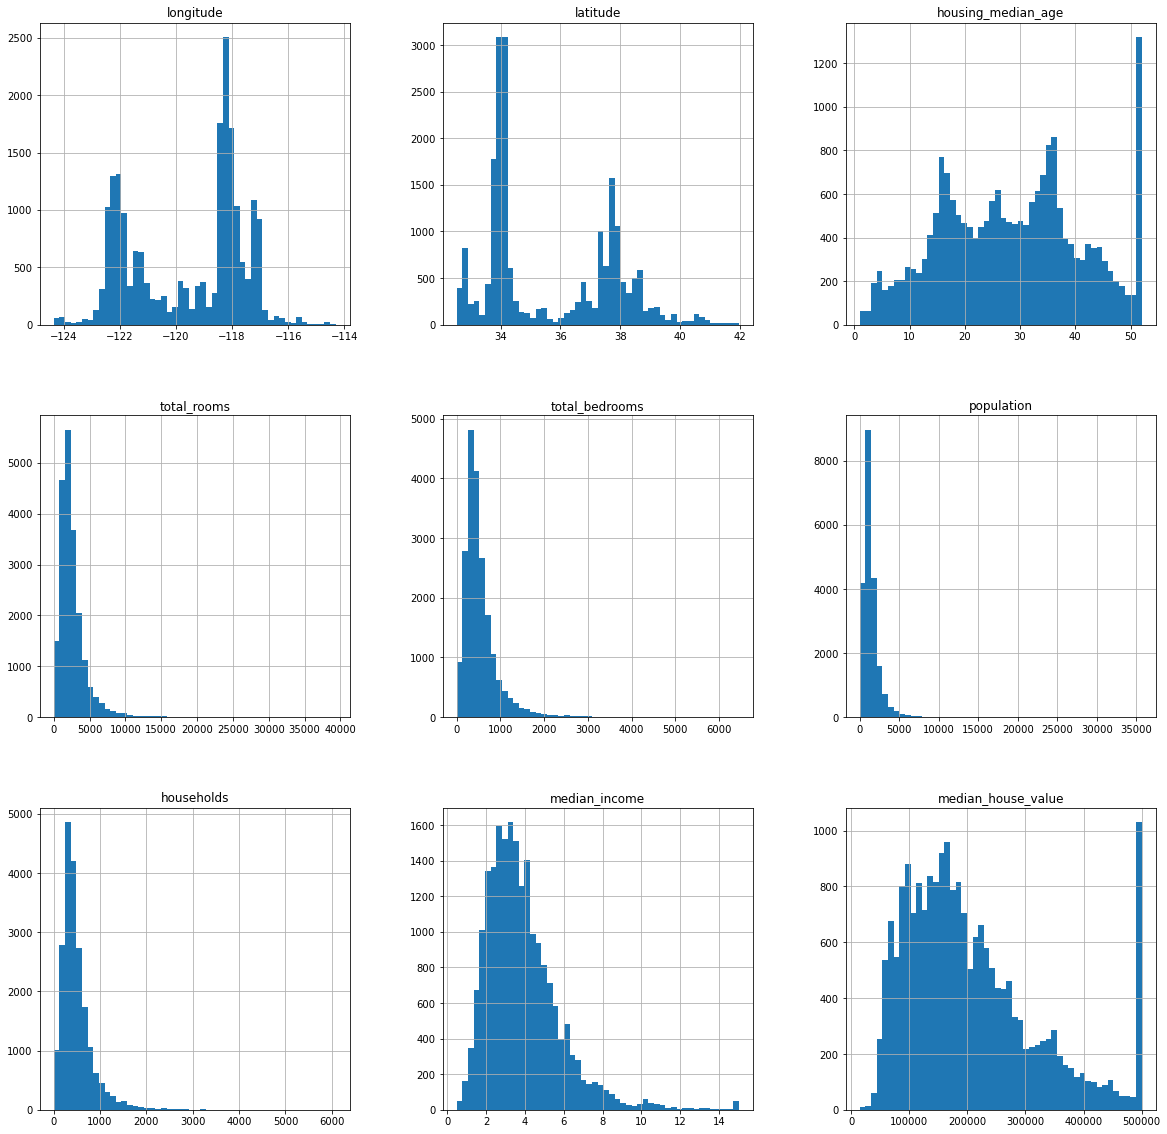

In [11]:
housing_data.hist(bins = 50,figsize = (20,20))
plt.show()

In [12]:
#self made function for test_train_split
def split_train_test (data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
train_set,test_set = split_train_test(housing_data,0.2)

In [14]:
len(train_set)

16512

In [15]:
len(test_set)

4128

In [16]:
#a way to not let data into test set that has previously been into training set

In [17]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff <test_ratio * 2**32

In [18]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [19]:
housing_with_id = housing_data.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [20]:
len(train_set)

16512

In [21]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
#simpler way

In [23]:
#chooses indices in simple random sampling way
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_data,test_size = 0.2,random_state =42)

In [24]:
#median income is a cont. numerical data,let's divide it in few categories

In [25]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],bins = [0, 1.5,3.0,4.5,6.0,np.inf],labels= [1,2,3,4,5])

<AxesSubplot:>

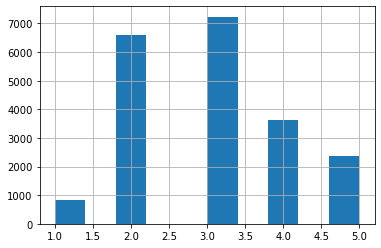

In [26]:
housing_data["income_cat"].hist()

In [27]:
#random sample split
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_data,test_size = 0.2,random_state =42)

In [28]:
#now we can do stratified sampling so that we get sure that we have taken dataset from each category for it to be unbiased

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set =housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [30]:
#to check proportion of income categories of simplr random sample ,startified sample with whole
print(test_set["income_cat"].value_counts()/len(test_set),
strat_test_set["income_cat"].value_counts() /len(strat_test_set),
housing_data["income_cat"].value_counts()/len(housing_data))

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64 3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64 3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [31]:
#if we want our data to be same as before we can drop income_cat from dataset

In [32]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis = 1,inplace = True)
    

In [33]:
'''till now we first got an idea of our dataset then we learnt about ways of spliting data in training and testing set'''

'till now we first got an idea of our dataset then we learnt about ways of spliting data in training and testing set'

In [34]:
#now we explore our training data 
#to do that without any ma=odification in training data lets make a copy
housing = strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

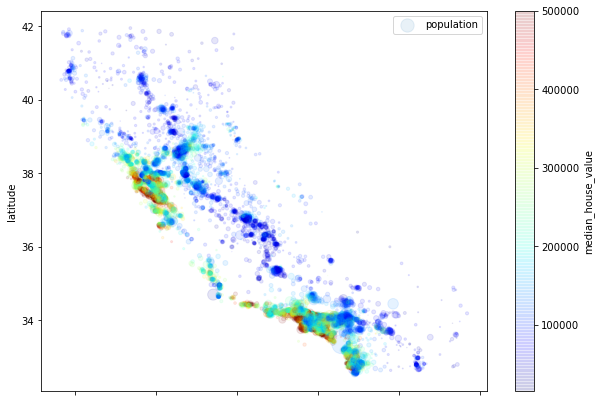

In [35]:
housing.plot(kind ='scatter',x= "longitude",y = "latitude",alpha = 0.1,s = housing["population"]/100,label = "population",figsize = (10,7),c ="median_house_value",cmap = plt.get_cmap("jet"),colorbar = True)
#s parameter manages the marker size of points
#c parameter manages the color of points 

In [36]:
housing.corr()["median_house_value"]

longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [37]:
#correlation is very high with median_income

In [38]:
#way to see correlation through graphs

In [39]:
from pandas.plotting import scatter_matrix

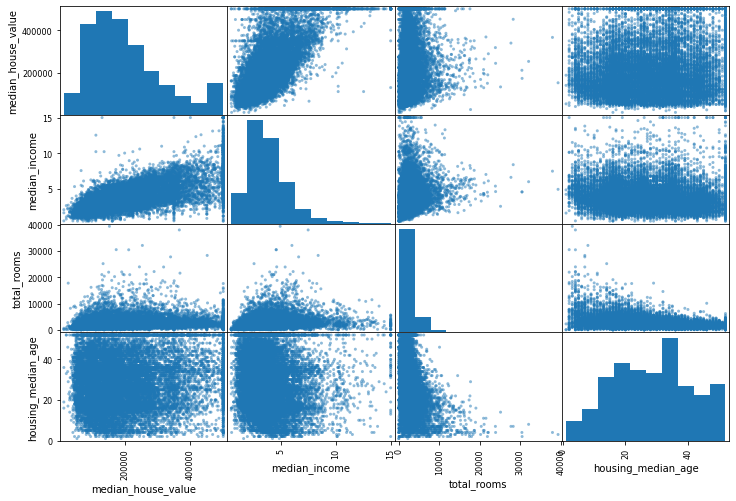

In [40]:
a = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[a],figsize = (12,8))
plt.show()

In [41]:
#lets zoom the strongest correlation

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

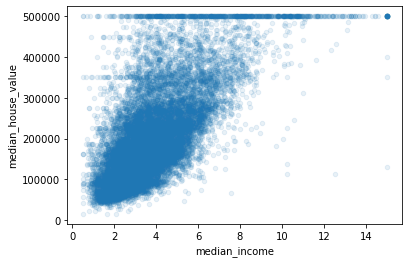

In [42]:
housing.plot(kind = "scatter",x = "median_income", y = "median_house_value",alpha = 0.1)

In [43]:
#lets combine some data to know more about data

In [44]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/ housing["total_rooms"]
housing["population_per_household"] = housing["population"]/ housing["households"]


In [45]:
housing.corr()["median_house_value"]

longitude                  -0.047432
latitude                   -0.142724
housing_median_age          0.114110
total_rooms                 0.135097
total_bedrooms              0.047689
population                 -0.026920
households                  0.064506
median_income               0.687160
median_house_value          1.000000
rooms_per_household         0.146285
bedrooms_per_room          -0.259984
population_per_household   -0.021985
Name: median_house_value, dtype: float64

In [46]:
#median house value is significantly related with bedrooms per room ,the lesser the ratio the more expensuvve houses are 

In [47]:
housing1 = strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [48]:
#for data to be used for machine learning first we need to handle missing values,we can use filllna but using function would be better

In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing_num = housing1.drop("ocean_proximity",axis = 1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [50]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [51]:
x = imputer.transform(housing_num)
x

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [52]:
#to convert again it into dataframe
housing_tr = pd.DataFrame(x,columns = housing_num.columns,index = housing_num.index)

In [53]:
#to fit and transform altogether we have fit_transform() method

In [54]:
#handling text and categorical attribute
housing_cat = housing[["ocean_proximity"]]
#to convert these categories from text to number
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[0:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [55]:
#use of double square bracket,converts a series of column into dataframe
type(housing_cat)

pandas.core.frame.DataFrame

In [56]:
#can get categories through 
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
'''in this method ml algorithm assume that two near categories are more similar
.i.e 0 and 1a re more simlar than 0and 4 so using one-hot coder will be ore appropriate
like dummy variable,1 for one value and 0 for others'''

'in this method ml algorithm assume that two near categories are more similar\n.i.e 0 and 1a re more simlar than 0and 4 so using one-hot coder will be ore appropriate\nlike dummy variable,1 for one value and 0 for others'

In [58]:
#another way of converting into numerical data
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [59]:
#to convert it into numpy array call.toarray()
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [60]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# custom transformers

In [61]:
#create your owm transformers for cutom works
#note : scikit learn relies on duck typing not inheritance
#the methods can simply be implemented by adding baseclass to the customized class
'''for fit_transform we can add TransformerMixin ,if we as BaseEstimator 
we can also get two extra method set params() and get_params()'''


'for fit_transform we can add TransformerMixin ,if we as BaseEstimator \nwe can also get two extra method set params() and get_params()'

In [62]:
from sklearn.base import BaseEstimator ,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X ,y = None):
        return self 
    def transform(self,X ,y = None):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room =  X[:,bedrooms_ix]/ X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household, bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attr = attr_adder.transform(housing1.values)

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('attr_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [64]:
#single transformer for both categorical and numerical data 

In [108]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline , num_attribs),
    ("cat", OneHotEncoder(),cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing1)
housing_prepared[1]


array([-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
       -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
       -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [66]:
#here ends the data cleaning and making it according to model which wil be applied

# selecting and training model

In [67]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)


LinearRegression()

In [68]:
#let's try it on few instances from training set

In [69]:
some_data = housing1.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:",lin_reg.predict(some_data_prepared))
print("labels:",list(some_labels))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [70]:
#let's measure RMSE

In [71]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse =np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [72]:
'''rmse value is not sp great ,it means that much data is
unexplained ,it does not perform so great on training set so the model is underfitting'''


'rmse value is not sp great ,it means that much data is\nunexplained ,it does not perform so great on training set so the model is underfitting'

In [73]:
'''to fix underfitting either we need to select more powerful model or feed training algorithm with better features or to reduce constraints on the model(this model is not regularized so last option does not imply )'''

'to fix underfitting either we need to select more powerful model or feed training algorithm with better features or to reduce constraints on the model(this model is not regularized so last option does not imply )'

In [74]:
#let's try a more complex model 


In [75]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [76]:
'''no error could be a case of overfitting,we can not touch test set until we are sure of model so we need a part of training set to train and another one to validate'''

'no error could be a case of overfitting,we can not touch test set until we are sure of model so we need a part of training set to train and another one to validate'

In [77]:
#using cross validation

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [79]:
scores

array([-4.91131599e+09, -4.51731621e+09, -5.22706076e+09, -4.75851805e+09,
       -5.10995610e+09, -5.52519147e+09, -5.22710119e+09, -4.95560819e+09,
       -5.79217604e+09, -5.12530669e+09])

In [80]:
def display_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("variance:",scores.std())

In [81]:
display_scores(tree_rmse_scores)

scores: [70080.78189114 67210.98279955 72298.41461402 68982.01251539
 71483.95691333 74331.63166718 72298.69425652 70396.08076593
 76106.34693569 71591.24731918]
mean: 71478.01496779115
variance: 2418.355756986742


In [82]:
#let's compute same for linear model


In [83]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean: 69052.46136345083
variance: 2731.6740017983425


In [84]:
#decision tree is overfitting,thats y it performs bad on validaion data

In [85]:
#let's try one another model

In [86]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18726.493104703135

In [87]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [49286.16348692 47753.46879306 50007.26658748 52122.41489705
 49648.32206229 53224.87951757 48825.49775105 48023.87888563
 52999.59453438 50369.92439481]
mean: 50226.14109102385
variance: 1857.207898807582


In [88]:
#checkout this library
import joblib


In [89]:
#fine-tuning the model

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators':[3,10,30],'max_features': [2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
             ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [92]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [93]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63889.243173609466 {'max_features': 2, 'n_estimators': 3}
55920.73622644956 {'max_features': 2, 'n_estimators': 10}
53036.80767660461 {'max_features': 2, 'n_estimators': 30}
59935.36249491541 {'max_features': 4, 'n_estimators': 3}
53017.19747585321 {'max_features': 4, 'n_estimators': 10}
50732.070195970446 {'max_features': 4, 'n_estimators': 30}
58355.55516716456 {'max_features': 6, 'n_estimators': 3}
52177.47454712168 {'max_features': 6, 'n_estimators': 10}
49977.144488163336 {'max_features': 6, 'n_estimators': 30}
58872.70960695713 {'max_features': 8, 'n_estimators': 3}
51593.902930183074 {'max_features': 8, 'n_estimators': 10}
49944.887624305404 {'max_features': 8, 'n_estimators': 30}
62395.2186552839 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54428.01817330277 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59930.2617084723 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52861.535225781365 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [94]:
#another way to fine tune
#RandomizedSearchCV
#ensemble method

# analyze the best model and their errors

In [95]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [96]:
feature_importances

array([7.16396853e-02, 6.41217075e-02, 4.35323216e-02, 1.53768405e-02,
       1.49163232e-02, 1.48122273e-02, 1.40789645e-02, 3.88683222e-01,
       4.62551986e-02, 1.08700529e-01, 5.08110317e-02, 3.37665786e-03,
       1.57926884e-01, 5.94650358e-05, 2.06386355e-03, 3.64507854e-03])

In [97]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [98]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_Per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs +extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse = True)

[(0.3886832219173356, 'median_income'),
 (0.15792688390823378, 'INLAND'),
 (0.10870052889512458, 'pop_per_hhold'),
 (0.07163968533509155, 'longitude'),
 (0.06412170751390786, 'latitude'),
 (0.050811031742821054, 'bedrooms_Per_room'),
 (0.04625519860648149, 'rooms_per_hhold'),
 (0.04353232161825128, 'housing_median_age'),
 (0.015376840473765033, 'total_rooms'),
 (0.014916323230380788, 'total_bedrooms'),
 (0.014812227288971714, 'population'),
 (0.014078964486765152, 'households'),
 (0.003645078538971587, 'NEAR OCEAN'),
 (0.00337665785724729, '<1H OCEAN'),
 (0.002063863550853042, 'NEAR BAY'),
 (5.946503579814145e-05, 'ISLAND')]

In [99]:
#with this info we can try dropping some less useful features

In [100]:
#evaluate the model on test set 

In [101]:
final_model = grid_search.best_estimator_

In [102]:
x_test = strat_test_set.drop("median_house_value",axis = 1)
y_test = strat_test_set["median_house_value"].copy()
x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47691.022139150016

In [103]:
#check 95% ci for generalization error

In [104]:
from scipy import stats
c = 0.95
squared_error = (final_predictions-y_test)**2
np.sqrt(stats.t.interval(c,len(squared_error)-1,loc = squared_error.mean(),scale=stats.sem(squared_error)))

array([45702.65272304, 49599.7451549 ])